# Работа с текстовыми данными (часть 2)

Задание: Обучите модель для определения принадлежности текста к одному из заданных классов. При разборе текста используйте разбор текста по частям речи

Для решения этого задания мы будем использовать библиотеку SpaCy (https://spacy.io/).
Библиотека spaCy выделяется своей эффективностью и производительностью. Она разработана с акцентом на скорость и точность, что делает ее предпочтительным выбором для многих разработчиков и исследователей в области NLP.

Основные концепции spaCy:

1. Токенизация и сегментация текста

2. Разделение текста на слова и пунктуацию.

Для начала установим эту библиотеку и скачаем необходимые модели:

*Примечание*: 

..._lg = large

..._md = medium

..._sm = small

Все модели бывают 3 типов, как Вы видите, в зависимости от размеров.
В зависимости от задачи и используемых метрик, можно использовать разные модели. Большие модели обладают ольшей accuracy, но и большим весом, у маленьких моделей accuracy, вероятно, будет ниже, однако, они обладают меньшим весом и могут быть использованы, например, для мобильных приложений.

In [2]:
# Если вы работаете через conda-окружение, есть смысл установить эти пакеты через консоль
%pip install -U spacy
%pip install -U spacy-lookups-data
#!python -m spacy download en_core_web_sm #для анализа английских текстов
!python -m spacy download ru_core_news_lg #для анализа русских текстов. Модель достаточно объёмная (513.4 Мб)

Note: you may need to restart the kernel to use updated packages.Collecting spacy
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
     ---------------------------------------- 0.0/169.7 kB ? eta -:--:--
     -------------- ------------------------ 61.4/169.7 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 169.7/169.7 kB 2.0 MB/s eta 0:00:00
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 3.3 MB/s eta 0:00:00
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/11.8 MB 21.8 MB/s eta 0:00:01
   --- -----------------------------------

  You can safely remove it manually.



  Using cached spacy_lookups_data-1.0.5-py2.py3-none-any.whl.metadata (4.8 kB)
Using cached spacy_lookups_data-1.0.5-py2.py3-none-any.whl (98.5 MB)


ERROR: Invalid requirement: '#для'


In [3]:
#проверка, что модели адекватно скачались
!python -m spacy validate


⠙ Loading compatibility table...
⠹ Loading compatibility table...
⠸ Loading compatibility table...
⠼ Loading compatibility table...
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.8.2) =================
ℹ spaCy installation:
c:\ProgramData\anaconda3\envs\MNE_EEG_env\Lib\site-packages\spacy

No pipeline packages found in your current environment.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [1]:
# импортируем необходимые модули для нашей работы

import spacy
from spacy import displacy

import os
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'spacy'

Для начала просто "поиграем" с библиотекой и посмотрим на её возможности:

##### Токенизация текста

In [4]:
# Загружаем языковую модель
nlp = spacy.load("en_core_web_sm")

# Входной текст
text = "spaCy is an amazing tool for natural language processing."

# Применяем токенизацию
doc = nlp(text)

# Выводим токены (слова и пунктуацию) из текста
for token in doc:
    print(token.text)

spaCy
is
an
amazing
tool
for
natural
language
processing
.


##### Разбиение текста на предложения

In [5]:
# Входной текст с несколькими предложениями
text = "SpaCy is fast. It's also efficient."

# Применяем разбиение на предложения
doc = nlp(text)

# Выводим предложения из текста
for sentence in doc.sents:
    print(sentence.text)

SpaCy is fast.
It's also efficient.


##### Частеречная разметка (POS-тегирование)

**Определение частей речи слов**

Частеречная разметка (Part-of-Speech tagging или POS-тегирование) – это процесс присвоения каждому слову в тексте определенной метки, соответствующей его грамматической роли. SpaCy предоставляет мощные инструменты для выполнения этой задачи.

**Значение частей речи для анализа текста**

Части речи являются ключевыми элементами анализа текста, поскольку они раскрывают структуру и смысл предложения. Различные части речи могут указывать на субъект, объект, действие, качество и т.д. Эта информация имеет большое значение для множества приложений, от анализа тональности до извлечения информации.

In [6]:
# Входной текст
text = "I like to read books."

# Применяем анализ
doc = nlp(text)

# Выводим слова и их части речи
for token in doc:
    print(token.text, token.pos_)

I PRON
like VERB
to PART
read VERB
books NOUN
. PUNCT


##### Лемматизация и нормализация

Приведение слов к их базовой форме

**Лемматизация** - это процесс приведения слова к его базовой форме (лемме) путем удаления окончаний и суффиксов. Это помогает унифицировать различные формы слова и улучшить точность анализа.

**Важность лемматизации при анализе текста**

Лемматизация позволяет снизить размерность данных, учитывая только базовые формы слов. Это особенно полезно, например, при анализе тональности, чтобы учесть все формы одного слова, когда выражается какой-либо оттенок.

In [293]:
text = "You're running dogs are happily barking usyafiah"

doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_)

You you
're be
running run
dogs dog
are be
happily happily
barking bark
usyafiah usyafiah


In [5]:
# интересно посмотреть также пример на русском языке:
nlp_rus = spacy.load('ru_core_news_lg')
lemm = nlp_rus('А розы упали на лапу Азора')
for token in lemm:
    print(token.text, token.lemma_)

А а
розы роза
упали упасть
на на
лапу лапа
Азора азор


##### Именованная сущность (NER)

Обнаружение и классификация именованных сущностей

**Именованные сущности (Named Entities)** - это объекты реального мира, которые можно идентифицировать по имени, такие как имена людей, места, даты, организации и т.д. Извлечение и классификация именованных сущностей является важной задачей в NLP. SpaCy предоставляет удобные инструменты для этой цели.

**Применение NER в задачах информационного поиска**

Извлечение именованных сущностей имеет множество применений. В информационном поиске, например, оно может быть использовано для автоматической классификации документов по тематикам, выделения ключевых фактов или для создания связей между сущностями.

In [10]:
text = "Apple is going to build a new office in London in 2023."

doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
London GPE
2023 DATE


##### Работа с векторными представлениями

**Векторные представления слов** - это числовые векторы, представляющие слова в многомерном пространстве таким образом, что семантически близкие слова имеют близкие векторы. Это понятие основано на гипотезе о дистрибутивности, согласно которой слова, используемые в похожих контекстах, имеют схожие значения.

**Использование встроенных векторов слов в spaCy**

Одной из мощных особенностей spaCy является наличие встроенных векторов слов, которые могут быть использованы для анализа семантической близости и сходства между словами. Эти векторы обучены на больших объемах текста и позволяют сравнивать слова на основе их семантического значения.

Для примера, используем векторное представление для сравнения двух слов:

In [11]:
# Получаем векторное представление слова "cat"
vector_cat = nlp("cat").vector

# Получаем векторное представление слова "dog"
vector_dog = nlp("dog").vector

# Вычисляем косинусное расстояние между векторами
similarity = np.dot(vector_cat, vector_dog) / np.linalg.norm(vector_cat) * np.linalg.norm(vector_dog)

print("Similarity between 'cat' and 'dog':", similarity)

Similarity between 'cat' and 'dog': 44.597546


Также в spacy представлена возможность визуализировать состав предложения:

In [6]:
text = "Quick brown fox jumps over the lazy dog"
doc = nlp(text)

displacy.render(doc, style='dep', jupyter=True,options={'distance': 140})

In [7]:
spacy.explain("amod")

'adjectival modifier'

In [ ]:
spacy.explain("ADJ"),spacy.explain("det") ,spacy.explain("ADP") ,spacy.explain("prep") ,spacy.explain("amod"),spacy.explain("case"),spacy.explain("nmod"),spacy.explain("conj") 

('adjective',
 'determiner',
 'adposition',
 'prepositional modifier',
 'adjectival modifier',
 'case marking',
 'modifier of nominal',
 'conjunct')

Перейдём к нашему основному заданию.

Проанализируем стихотворения С.А.Есенина и других случайных авторов и попробуем решить задачу бинарной классификации.

In [8]:
os.chdir(r"C:/Users/Анна/Desktop/ML занятия/HSE ML/HSE ML/DataSets/Text/Text/Text")

data_es = pd.read_csv('esenin-2.csv')
data_rand = pd.read_csv('random-2.csv')

In [9]:
# посмотрим на данные
data_es

,id,poem
0,0,"Есть музыка, стихи и танцы,\r\r\nЕсть ложь и л..."
1,1,"Радость, как плотвица быстрая,\r\r\nЮрко свети..."
2,2,Алый мрак в небесной черни\r\r\nНачертил пожар...
3,3,"Сестре Шуре\r\r\n\r\r\nАх, как мн..."
4,4,"Ах, метель такая, просто черт возьми!\r\r\nЗаб..."
...,...,...
338,338,"Я снова здесь, в семье родной,\r\r\nМой край, ..."
339,339,"Я спросил сегодня у менялы,\r\r\nЧто даёт за п..."
340,340,Я странник убогий.\r\r\nС вечерней звездой\r\r...
341,341,Я усталым таким еще не был\r\r\nВ эту серую мо...


Классифицируем стихи С.А.Есенина в класс "1", а остальные - в класс "0" и создадим единый датафрейм.

In [16]:
data_es['Class'] = 1
data_rand['Class'] = 0
data = pd.concat([data_es, data_rand], axis=0)
data = data.sample(frac=1).reset_index(drop=True) #перемешиваем данные

In [17]:
# посмотрим распределение датасета по классам
data['Class'].value_counts()

Class
0    500
1    343
Name: count, dtype: int64

Сначала мы используем возможности Spacy для извлечения векторов из текста и построения модели классификации.

Векторы в spaCy строятся с использованием предварительно обученных моделей, которые обучаются на больших корпусах текста. Эти модели используют алгоритмы глубокого обучения для извлечения семантической информации из текста и представления ее в виде числовых векторов.

Процесс построения векторов в spaCy включает следующие шаги:

1. Загрузка предварительно обученной модели spaCy для выбранного языка. Например, вы можете загрузить модель "en_core_web_sm" для английского языка с помощью команды nlp = spacy.load("ru_core_news_lg").

2. Обработка текста с помощью объекта nlp. Это преобразует текст в объект, который содержит различные атрибуты и методы для работы с текстом.

3. Для каждого токена в тексте можно получить его векторное представление с помощью атрибута token.vector. Вектор представляет собой числовое представление, которое кодирует семантическую информацию о токене.

In [18]:
nlp_rus = spacy.load("ru_core_news_lg")
data['vector'] = data['poem'].apply(lambda text:nlp_rus(text).vector)

Далее переходим к уже привычному нам способу построения моделей:

In [19]:
X = pd.DataFrame(data['vector'].to_list())
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
res_knn = knn_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
res_nb = nb_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
res_dt = dt_model.predict(X_test)

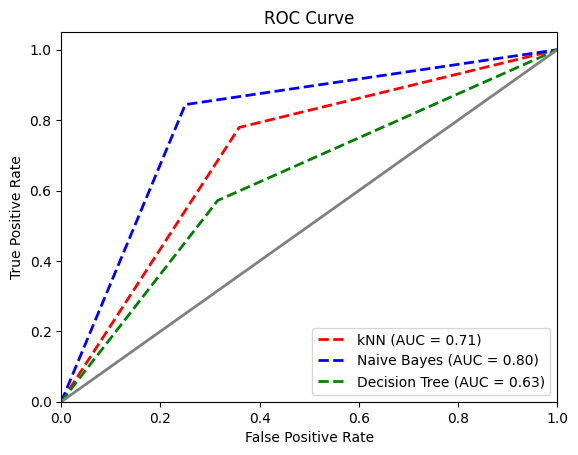

In [21]:
# Вычисление ROC-кривых
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
auc_knn = roc_auc_score(y_test, res_knn)
auc_nb = roc_auc_score(y_test, res_nb)
auc_dt = roc_auc_score(y_test, res_dt)

# Визуализировать ROC-кривую
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, linestyle='--', label=f'kNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: title={'center': 'Conf matrix DT'}>

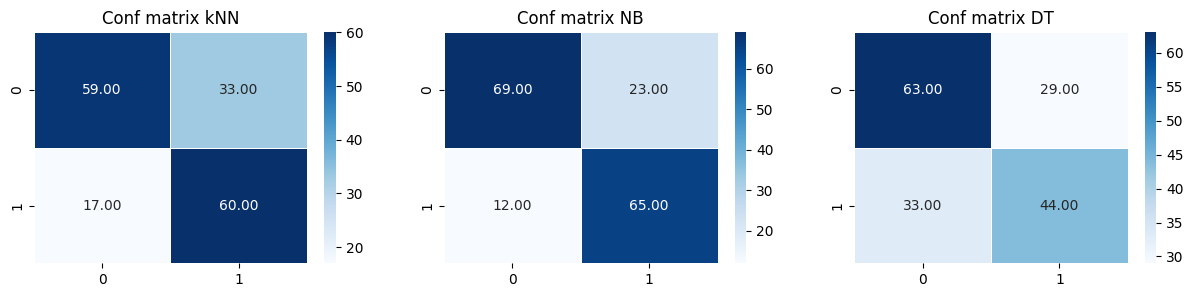

In [22]:
plt.figure(figsize=(15,3))

conf_matrix_knn = confusion_matrix(y_test, res_knn)
conf_matrix_nb = confusion_matrix(y_test, res_nb)
conf_matrix_dt = confusion_matrix(y_test, res_dt)

plt.subplot(1, 3, 1)
plt.title('Conf matrix kNN')
sns.heatmap(conf_matrix_knn,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(1, 3, 2)
plt.title('Conf matrix NB')
sns.heatmap(conf_matrix_nb,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(1, 3, 3)
plt.title('Conf matrix DT')
sns.heatmap(conf_matrix_dt,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

In [23]:
print('Результат kNN: \n', classification_report(y_test, res_knn))
print('Результат NB: \n', classification_report(y_test, res_nb))
print('Результат Decision Tree: \n', classification_report(y_test, res_dt))

Результат kNN: 
               precision    recall  f1-score   support

           0       0.78      0.64      0.70        92
           1       0.65      0.78      0.71        77

    accuracy                           0.70       169
   macro avg       0.71      0.71      0.70       169
weighted avg       0.72      0.70      0.70       169

Результат NB: 
               precision    recall  f1-score   support

           0       0.85      0.75      0.80        92
           1       0.74      0.84      0.79        77

    accuracy                           0.79       169
   macro avg       0.80      0.80      0.79       169
weighted avg       0.80      0.79      0.79       169

Результат Decision Tree: 
               precision    recall  f1-score   support

           0       0.66      0.68      0.67        92
           1       0.60      0.57      0.59        77

    accuracy                           0.63       169
   macro avg       0.63      0.63      0.63       169
weighted avg  

Теперь попробуем использовать другой подход к выделению признаков из текста. **Мы посчитаем, сколько частей речи каждого типа находится в каждом тексте и срежнее положение этой части речи в тексте.**

В Spacy используются следующие части речи:

1. ADJ: adjective/прилагательное
2. ADP: adposition/дополнение
3. ADV: adverb/наречие
4. AUX: auxiliary/вспомогательный
5. CCONJ: coordinating conjunction/сочинительный союз (и, да и др.)
6. DET: determiner/определитель (a/an и the)
7. INTJ: interjection/междометие
8. NOUN: noun/существительное
9. NUM: numeral/числительное
10. PART: particle/частица
11. PRON: pronoun/местоимение
12. PROPN: proper noun/имя собственное
13. PUNCT: punctuation/знаки препинания
14. SCONJ: subordinating conjunction/подчинительный союз (когда, что, чтобы и др.)
15. SYM: symbol/символ
15. VERB: verb/глагол
16. X: other/другое

Это далеко не полный список всех частей речи(POS), которые используются в Spacy. С полным списком можно ознакомиться по [ссылке](https://github.com/explosion/spaCy/blob/master/spacy/glossary.py)

In [268]:
nlp_rus = spacy.load("ru_core_news_lg")
data_2 = pd.concat([data_es, data_rand], axis=0).reset_index().drop(columns='index')
data_2

,id,poem,Class
0,0,"Есть музыка, стихи и танцы,\r\r\nЕсть ложь и л...",1
1,1,"Радость, как плотвица быстрая,\r\r\nЮрко свети...",1
2,2,Алый мрак в небесной черни\r\r\nНачертил пожар...,1
3,3,"Сестре Шуре\r\r\n\r\r\nАх, как мн...",1
4,4,"Ах, метель такая, просто черт возьми!\r\r\nЗаб...",1
...,...,...,...
838,495,"Как осенью ненастной тлеет \r\r\nСвятая озимь,...",0
839,496,"Издай, Кулидж,\r\r\nрадостный клич!\r\r\nНа хо...",0
840,497,".......одинокий, потерянный,\r\r\n Я как ...",0
841,498,"В мире широком, в море шумящем\r\r\n Мы - гр...",0


Для подсчёта мы применим языковую модель к каждому стиху в датафрейме, извлечём информацию о частях речи для каждого токена и посчитаем среднюю позицию в тексте и количество токенов соответствующего типа для каждого текста.
Мы проверяём расстановку в тексте только 11 частей речи. Можно попробовать добавить новые (это дополнительное задание)

In [269]:
import warnings

# Убрать предупреждения
warnings.filterwarnings('ignore')

# Функция для применения разбиения на части речи к тексту
def apply_pos(text):
    doc = nlp_rus(text)
    pos_tags = [token.pos_ for token in doc]
    return np.array(pos_tags)

# Создание пустого датафрейма
df = pd.DataFrame()

for i in range(data_2.shape[0]):
    PoS_list = apply_pos(data_2.iloc[i]['poem'])
    df = pd.concat([df, pd.DataFrame({
    'ADJ': [np.sum(np.where(PoS_list == 'ADJ')[0])/np.where(PoS_list == 'ADJ')[0].shape[0]],
    'ADJ_col': [np.where(PoS_list == 'ADJ')[0].shape[0]],
    'ADP': [np.sum(np.where(PoS_list == 'ADP')[0])/np.where(PoS_list == 'ADP')[0].shape[0]],
    'ADP_col': [np.where(PoS_list == 'ADP')[0].shape[0]],
    'ADV': [np.sum(np.where(PoS_list == 'ADV')[0])/np.where(PoS_list == 'ADV')[0].shape[0]],
    'ADV_col': [np.where(PoS_list == 'ADV')[0].shape[0]],
    'AUX': [np.sum(np.where(PoS_list == 'AUX')[0])/np.where(PoS_list == 'AUX')[0].shape[0]],
    'AUX_col': [np.where(PoS_list == 'AUX')[0].shape[0]],
    'CCONJ': [np.sum(np.where(PoS_list == 'CCONJ')[0])/np.where(PoS_list == 'CCONJ')[0].shape[0]],
    'CCONJ_col': [np.where(PoS_list == 'CCONJ')[0].shape[0]],
    'DET': [np.sum(np.where(PoS_list == 'DET')[0])/np.where(PoS_list == 'DET')[0].shape[0]],
    'DET_col': [np.where(PoS_list == 'DET')[0].shape[0]],
    'INTJ': [np.sum(np.where(PoS_list == 'INTJ')[0])/np.where(PoS_list == 'INTJ')[0].shape[0]],
    'INTJ_col': [np.where(PoS_list == 'INTJ')[0].shape[0]],
    'NOUN': [np.sum(np.where(PoS_list == 'NOUN')[0])/np.where(PoS_list == 'NOUN')[0].shape[0]],
    'NOUN_col': [np.where(PoS_list == 'NOUN')[0].shape[0]],
    'NUM': [np.sum(np.where(PoS_list == 'NUM')[0])/np.where(PoS_list == 'NUM')[0].shape[0]],
    'NUM_col': [np.where(PoS_list == 'NUM')[0].shape[0]],
    'PART': [np.sum(np.where(PoS_list == 'PART')[0])/np.where(PoS_list == 'PART')[0].shape[0]],
    'PART_col': [np.where(PoS_list == 'PART')[0].shape[0]],
    'PRON': [np.sum(np.where(PoS_list == 'PRON')[0])/np.where(PoS_list == 'PRON')[0].shape[0]],
    'PRON_col': [np.where(PoS_list == 'PRON')[0].shape[0]],
    'PUNCT': [np.sum(np.where(PoS_list == 'PUNCT')[0])/np.where(PoS_list == 'PUNCT')[0].shape[0]],
    'PUNCT_col': [np.where(PoS_list == 'PUNCT')[0].shape[0]],
    'SCONJ': [np.sum(np.where(PoS_list == 'PUNCT')[0])/np.where(PoS_list == 'PUNCT')[0].shape[0]],
    'SCONJ_col': [np.where(PoS_list == 'PUNCT')[0].shape[0]],
    'VERB': [np.sum(np.where(PoS_list == 'PUNCT')[0])/np.where(PoS_list == 'PUNCT')[0].shape[0]],
    'VERB_col': [np.where(PoS_list == 'PUNCT')[0].shape[0]],
    })], axis=0)

In [270]:
df = df.reset_index()
df = df.drop(columns='index')
df

,ADJ,ADJ_col,ADP,ADP_col,ADV,ADV_col,AUX,AUX_col,CCONJ,CCONJ_col,...,PART,PART_col,PRON,PRON_col,PUNCT,PUNCT_col,SCONJ,SCONJ_col,VERB,VERB_col
0,149.000000,6,125.625000,16,130.000000,8,40.0,1,77.625000,8,...,142.363636,11,125.307692,13,109.390244,41,109.390244,41,109.390244,41
1,30.500000,2,42.333333,6,59.000000,1,NaN,0,22.333333,3,...,39.500000,4,51.000000,1,35.833333,12,35.833333,12,35.833333,12
2,37.000000,8,47.000000,7,NaN,0,NaN,0,51.750000,4,...,NaN,0,46.800000,5,39.272727,11,39.272727,11,39.272727,11
3,44.750000,4,56.700000,10,44.714286,7,NaN,0,76.000000,4,...,33.500000,4,65.727273,11,59.176471,17,59.176471,17,59.176471,17
4,19.000000,3,26.000000,2,NaN,0,NaN,0,21.000000,1,...,13.000000,3,25.333333,3,13.166667,6,13.166667,6,13.166667,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,18.800000,5,12.000000,1,21.000000,2,NaN,0,18.000000,1,...,19.000000,1,NaN,0,23.000000,6,23.000000,6,23.000000,6
839,34.750000,4,32.000000,4,15.000000,1,NaN,0,36.333333,3,...,14.000000,1,23.000000,2,29.800000,10,29.800000,10,29.800000,10
840,59.125000,8,71.000000,8,95.800000,5,NaN,0,79.250000,4,...,72.625000,8,87.461538,13,82.371429,35,82.371429,35,82.371429,35
841,20.000000,7,19.500000,4,17.000000,1,NaN,0,16.000000,1,...,NaN,0,36.500000,4,29.200000,10,29.200000,10,29.200000,10


In [274]:
# Восстановить предупреждения (если нужно)
warnings.filterwarnings('default')

df = df.fillna(0) #не все части речи есть во всех предложениях, так что нам нужно избавиться от na

#добавим в полученный датафрейм колонку класс
df['Сlass'] = data_2['Class']

#перемешиваем данные
df = df.sample(frac=1).reset_index(drop=True) 

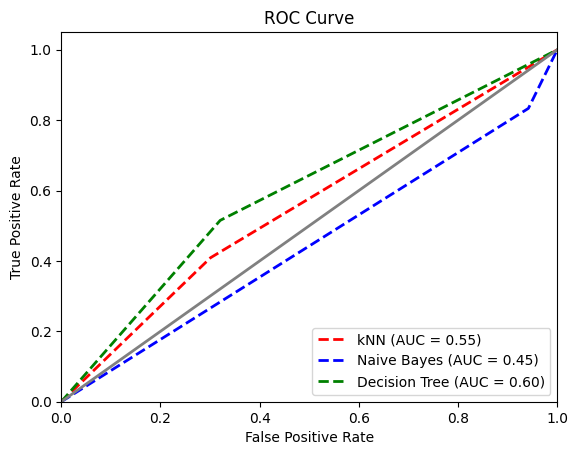

In [275]:
# Переходим к привычному обучению моделей и анализу результатов
X = df.drop(columns=['Сlass'])
y = df['Сlass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
res_knn_2 = knn_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
res_nb_2 = nb_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
res_dt_2 = dt_model.predict(X_test)

# Вычисление ROC-кривых
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn_2)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_nb_2)
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt_2)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
auc_knn = roc_auc_score(y_test, res_knn_2)
auc_nb = roc_auc_score(y_test, res_nb_2)
auc_dt = roc_auc_score(y_test, res_dt_2)

# Визуализировать ROC-кривую
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, linestyle='--', label=f'kNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: title={'center': 'Conf matrix DT'}>

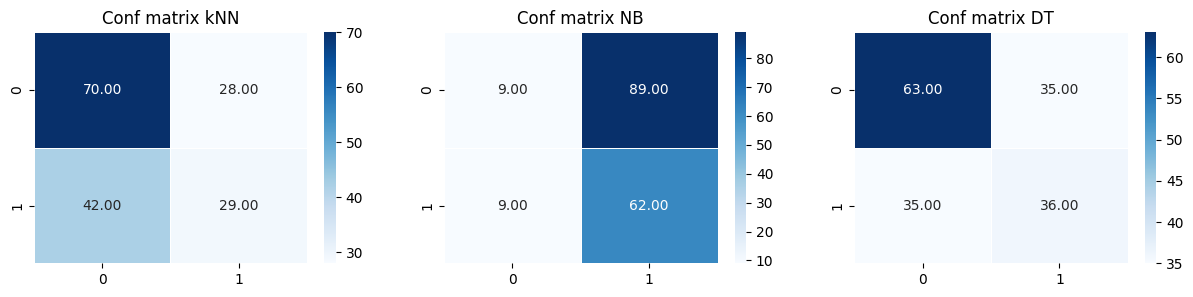

In [229]:
plt.figure(figsize=(15,3))

conf_matrix_knn = confusion_matrix(y_test, res_knn_2)
conf_matrix_nb = confusion_matrix(y_test, res_nb_2)
conf_matrix_dt = confusion_matrix(y_test, res_dt_2)

plt.subplot(1, 3, 1)
plt.title('Conf matrix kNN')
sns.heatmap(conf_matrix_knn,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(1, 3, 2)
plt.title('Conf matrix NB')
sns.heatmap(conf_matrix_nb,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(1, 3, 3)
plt.title('Conf matrix DT')
sns.heatmap(conf_matrix_dt,cmap='Blues',annot=True, fmt=".2f", linewidths=0.5)

In [230]:
print('Результат kNN: \n', classification_report(y_test, res_knn_2))
print('Результат NB: \n', classification_report(y_test, res_nb_2))
print('Результат Decision Tree: \n', classification_report(y_test, res_dt_2))

Результат kNN: 
               precision    recall  f1-score   support

           0       0.62      0.71      0.67        98
           1       0.51      0.41      0.45        71

    accuracy                           0.59       169
   macro avg       0.57      0.56      0.56       169
weighted avg       0.58      0.59      0.58       169

Результат NB: 
               precision    recall  f1-score   support

           0       0.50      0.09      0.16        98
           1       0.41      0.87      0.56        71

    accuracy                           0.42       169
   macro avg       0.46      0.48      0.36       169
weighted avg       0.46      0.42      0.32       169

Результат Decision Tree: 
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        98
           1       0.51      0.51      0.51        71

    accuracy                           0.59       169
   macro avg       0.57      0.57      0.57       169
weighted avg  

Мы рассмотрели два новых подхода к выделению признаков из текста и построению модели классификации текста.  

Тем не менее, хочется отметить, что построение языковых моделей этим далеко не ограничивается.
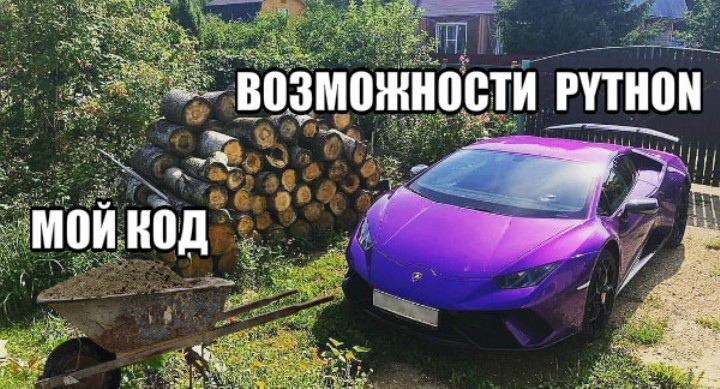

То, чем мы с вами занимаемся называется feature engineering. Однако, есть и принципиально другие идеи, а именно, использование различных нейронных сетей для построения языковых моделей.

Если Вам интересна тема NLP, рекомендую посмотреть это [видео](https://www.youtube.com/watch?v=MBQdMQUZMQM&feature=youtu.be) 